In [7]:
library(ggpubr)
library(tidyverse)

source("../src/dms-analysis-utils.R")

sumstats_norm <- read_tsv("../sumstats/TYK2/run10/tyk2-run10-DL4_1-normalized.tsv")
sumstats_raw <- read_tsv("../sumstats/TYK2/run10/tyk2-run10-DL4_1-unnormalized.tsv")

Rows: 1400 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): aa, contrast
dbl (7): chunk, pos, log2ContrastEstimate, log2ContrastError, statistic, p.v...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2800 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): aa, contrast
dbl (6): chunk, pos, log2FoldChange, log2StdError, statistic, p.value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


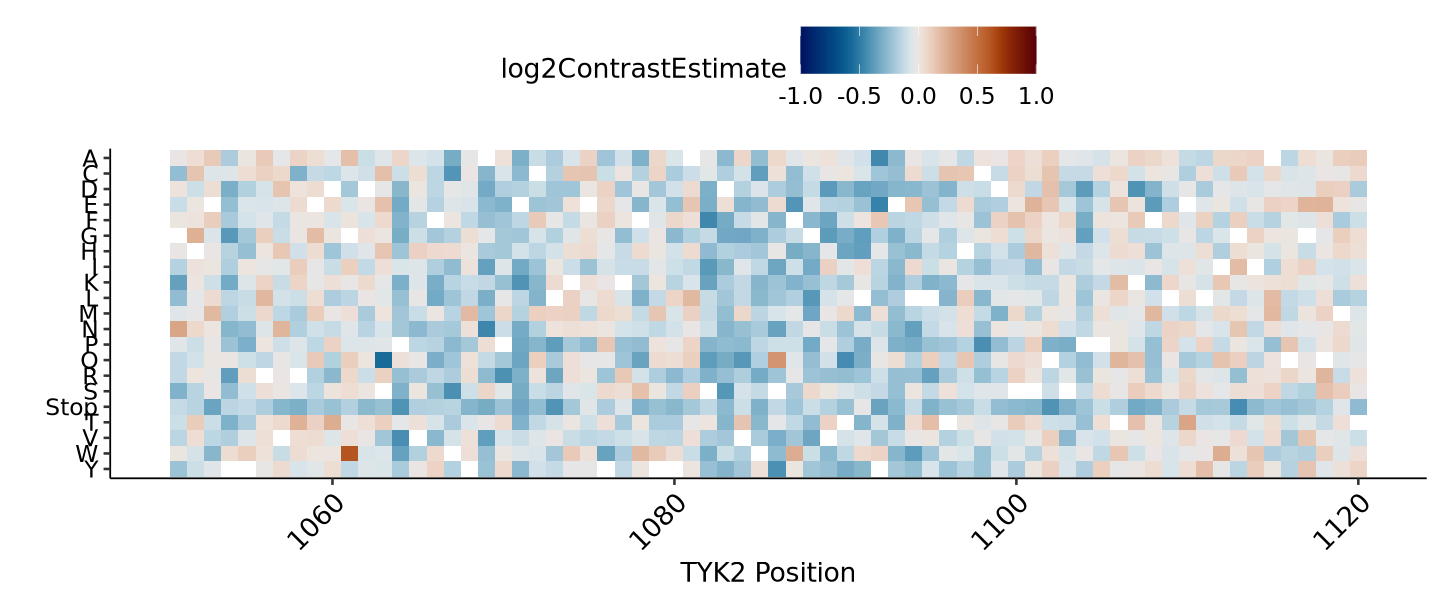

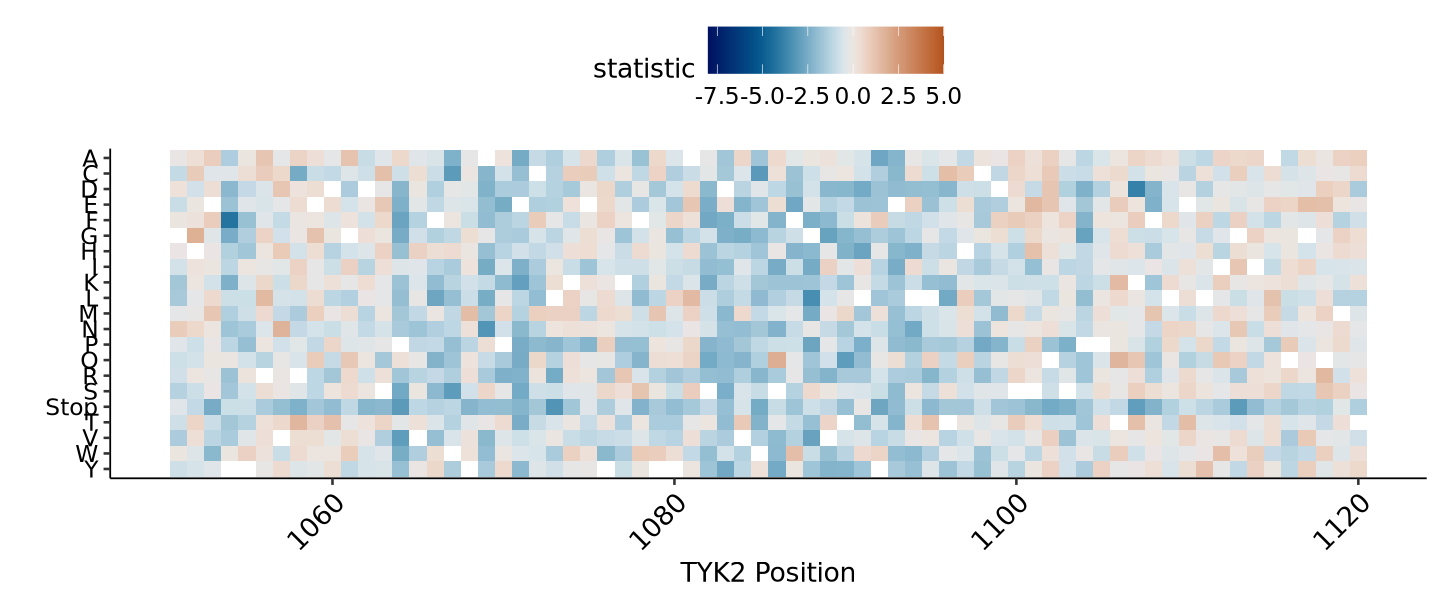

In [35]:
options(repr.plot.width = 12, repr.plot.height = 5)
sumstats_norm %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill = log2ContrastEstimate)) +
        scale_fill_scico_mid( limits = c(-1,1), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14)) +
        xlab("TYK2 Position") + ylab("")

sumstats_norm %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill =statistic)) +
        scale_fill_scico_mid( limits = c(-8,5), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14))  +
        xlab("TYK2 Position") + ylab("")

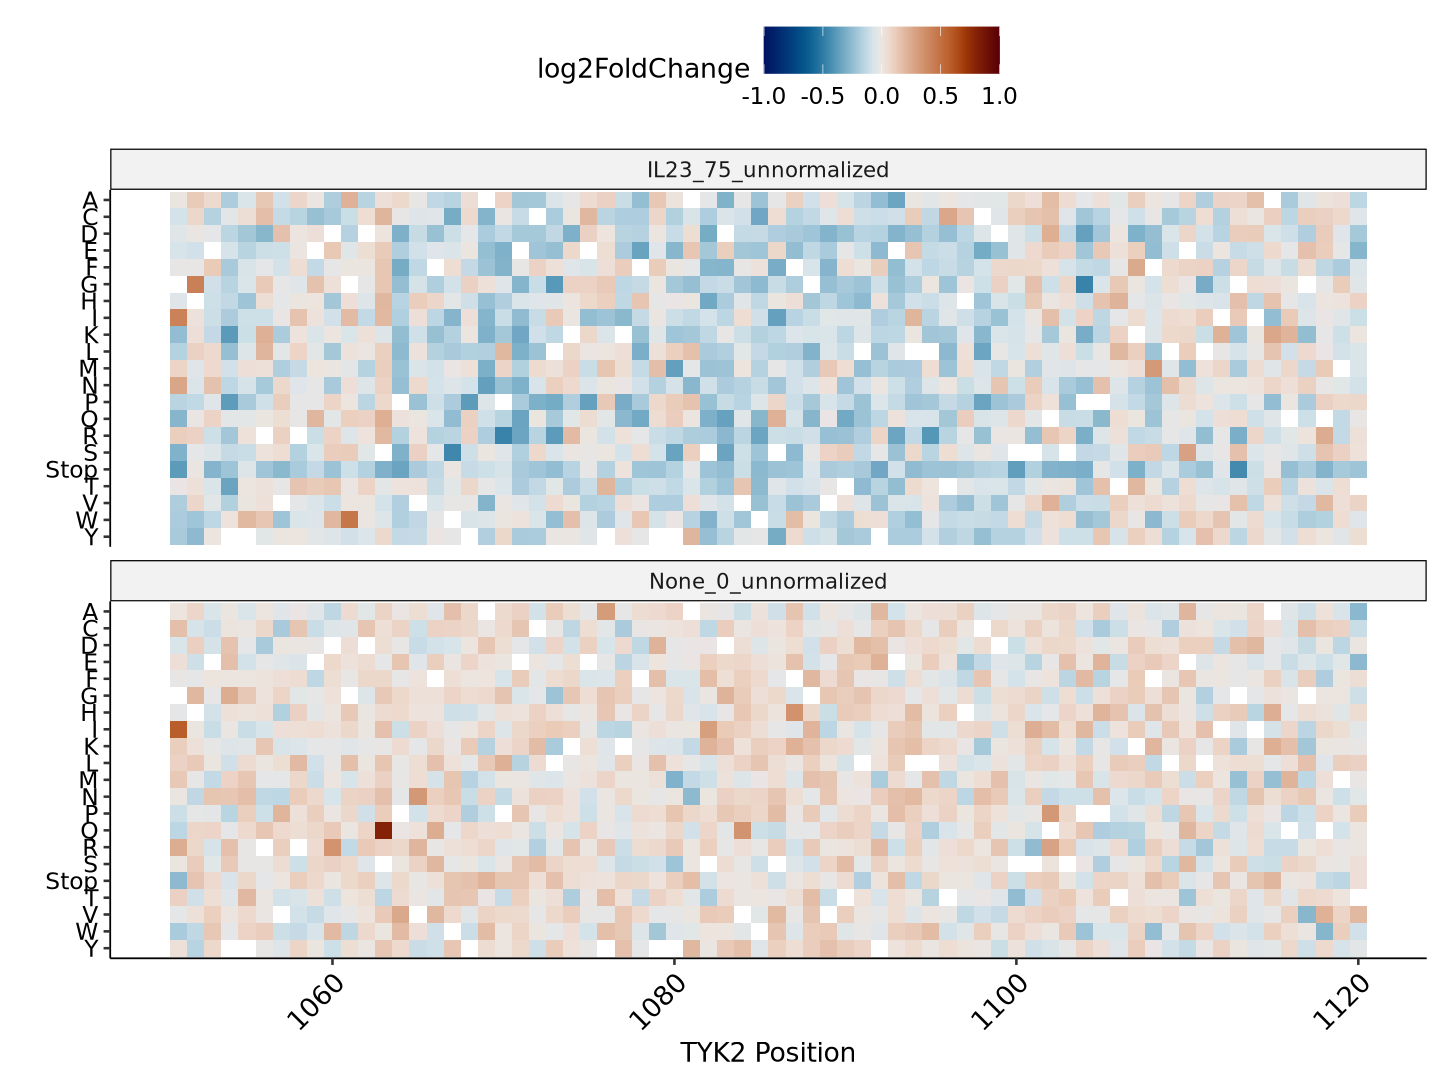

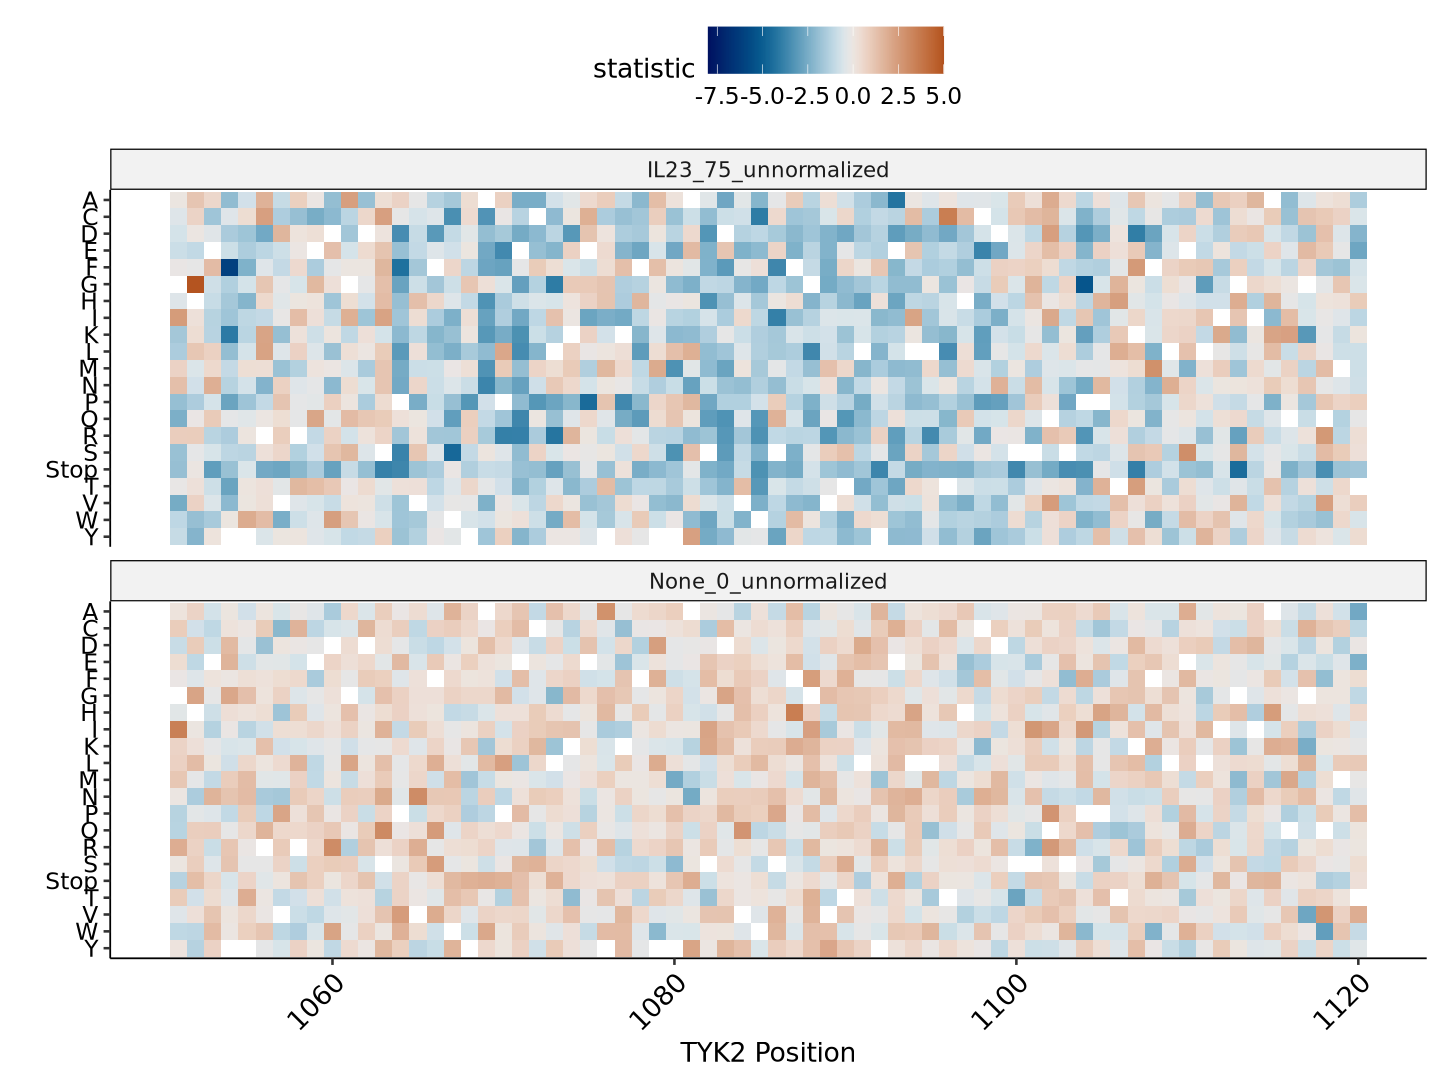

In [36]:
options(repr.plot.width = 12, repr.plot.height = 9)
sumstats_raw %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill =log2FoldChange)) +
        scale_fill_scico_mid( limits = c(-1,1), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14)) +
        facet_wrap(~contrast, ncol = 1)  +
        xlab("TYK2 Position") + ylab("")

sumstats_raw %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill = statistic)) +
        scale_fill_scico_mid( limits = c(-8,5), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14)) +
        facet_wrap(~contrast, ncol = 1)  +
        xlab("TYK2 Position") + ylab("")